## 36120: Advanced Machine Learning Application

### Machine Learning Streamlit Application


The following activitives are performed in this task.

1] Loading and Exploration of the Dataset


2] Data Preparation

		- Features Selection

		- Converting boolean features to string type

		- Feature Engineering: Extracting departure date related information function

		- Splitting features and target variable

		- Splitting the dataset into training (60%), validation (20%), and test (20%)

3] Modelling

		- Baseline Performance

		- Preparing data for Tensorflow

		- Defining Architecture for Tensorflow

		- Training the Tensorflow Model
    
4] Model Evaluation

		- Evaluating Model Performance

		- Saving the Model

In [5]:
# Importing Python and other required packages
import pandas as pd
import numpy as np

# Importing SKLearn and tensorflow packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras.layers import Dense, Dropout, DenseFeatures

# Importing required Data Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

In [3]:
# To reload moules
%load_ext autoreload
%autoreload 2

In [4]:
# To ignore warnings
warnings.filterwarnings('ignore')

#### 1] Loading and Exploration of the Dataset

• Loading flight transaction data

In [6]:
# Loading the processed dataset
df_data = pd.read_pickle('/tf/notebooks/optimized_df_final.pkl')

• Exploring the flight transaction data

In [7]:
# Checking records of the dataset
df_data.head()

,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,avgFare,flightDuration,cabinCode,flightDepartureHour,flightDepartureMinute
17,2022-04-23,2022-06-17,ATL,BOS,False,False,False,302.200012,947.0,302.200012,13980,c,12,22
26,2022-04-23,2022-06-17,ATL,BOS,False,False,False,392.100006,956.0,392.100006,12480,c,13,0
138,2022-04-23,2022-06-17,ATL,DTW,True,False,False,291.200012,1278.0,291.200012,15240,c,20,0
237,2022-04-23,2022-06-17,ATL,LAX,True,False,False,348.200012,2245.0,348.200012,21300,c,22,50
319,2022-04-23,2022-06-17,ATL,LGA,True,False,False,262.200012,1118.0,262.200012,12420,c,23,54


• Checking size of the datasets

In [8]:
# Checking size of the dataset
df_data.shape

(1721518, 14)

• Checking column names

In [9]:
# Checking column names of the dataset
df_data.columns

Index(['searchDate', 'flightDate', 'startingAirport', 'destinationAirport',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'totalFare',
       'totalTravelDistance', 'avgFare', 'flightDuration', 'cabinCode',
       'flightDepartureHour', 'flightDepartureMinute'],
      dtype='object')

• Checking summary information of the dataset

In [10]:
# Checking summary information of the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721518 entries, 17 to 13519998
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   searchDate             datetime64[ns]
 1   flightDate             datetime64[ns]
 2   startingAirport        category      
 3   destinationAirport     category      
 4   isBasicEconomy         bool          
 5   isRefundable           bool          
 6   isNonStop              bool          
 7   totalFare              float32       
 8   totalTravelDistance    float32       
 9   avgFare                float32       
 10  flightDuration         uint16        
 11  cabinCode              category      
 12  flightDepartureHour    uint8         
 13  flightDepartureMinute  uint8         
dtypes: bool(3), category(3), datetime64[ns](2), float32(3), uint16(1), uint8(2)
memory usage: 75.5 MB


The above summary information indicates that the features are of various datatypes such as datetime, categorical, numerical and boolean. 

The target variable, 'avgFare' indicating the average flight fare, is a continuous variable. During the data processing phase, it is obtained by grouping the 'legId' and 'flightDate' features, and then calculating the average of the 'totalFare' values within each group. This process results in the average flight fare for each unique combination of 'legId' and 'flightDate.'

Due to factors like the number of transits and various airline companies influencing ticket fares, accurate fare determination was challenging. Therefore, we utilize the average fares for the same flight and across different airline companies as the target variable. 

• Checking statistical summary of the dataset

In [11]:
# Checking statistical summary of the dataset
df_data.describe()

,searchDate,flightDate,totalFare,totalTravelDistance,avgFare,flightDuration,flightDepartureHour,flightDepartureMinute
count,1721518,1721518,1.721518e+06,1.721518e+06,1.721518e+06,1.721518e+06,1.721518e+06,1.721518e+06
mean,2022-05-01 18:37:39.249801472,2022-05-31 00:39:37.217316864,4.339669e+02,1.770345e+03,4.342004e+02,1.862113e+04,1.168175e+01,2.549481e+01
min,2022-04-16 00:00:00,2022-04-17 00:00:00,2.397000e+01,9.700000e+01,2.397000e+01,2.760000e+03,0.000000e+00,0.000000e+00
25%,2022-04-23 00:00:00,2022-05-12 00:00:00,2.672100e+02,1.104000e+03,2.688803e+02,1.356000e+04,7.000000e+00,7.000000e+00
50%,2022-05-02 00:00:00,2022-05-31 00:00:00,3.966000e+02,1.770345e+03,3.966900e+02,1.830000e+04,1.100000e+01,2.600000e+01
75%,2022-05-09 00:00:00,2022-06-18 00:00:00,5.453400e+02,2.501000e+03,5.426010e+02,2.382000e+04,1.500000e+01,4.100000e+01
max,2022-05-19 00:00:00,2022-07-17 00:00:00,8.260610e+03,4.430000e+03,8.260610e+03,5.910000e+04,2.300000e+01,5.900000e+01
std,NaN,NaN,2.535652e+02,8.081974e+02,2.498273e+02,6.643062e+03,5.093567e+00,1.894282e+01


• Checking if any null values in the dataset

In [12]:
# Checking if any null values in the dataset
df_data.isnull().sum()

searchDate               0
flightDate               0
startingAirport          0
destinationAirport       0
isBasicEconomy           0
isRefundable             0
isNonStop                0
totalFare                0
totalTravelDistance      0
avgFare                  0
flightDuration           0
cabinCode                0
flightDepartureHour      0
flightDepartureMinute    0
dtype: int64

• Checking distribution of target variable 'avgFare' 

<Axes: xlabel='avgFare'>

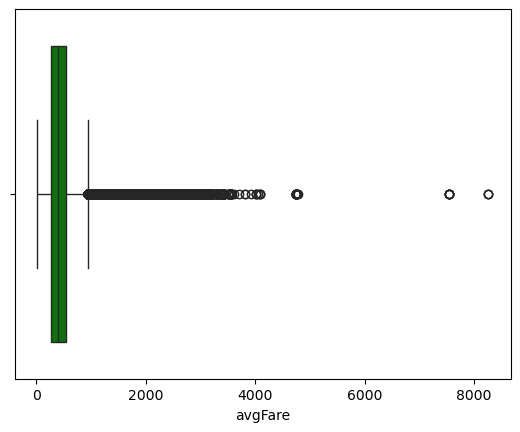

In [13]:
# Checking distribution of target variable 'avgFare' 
sns.boxplot(x='avgFare', data=df_data, color='green')

• Checking correlation between target variable and features

In [14]:
# Plotting Heatmap 
plt.figure(figsize=(9, 9))
#sns.heatmap(df_data.corr(), annot=True, cmap='summer_r')

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

• Checking the date ranges for flight departure and search date

In [15]:
# Checking the date ranges for flight search date
print(min(df_data['searchDate']))
print(max(df_data['searchDate']))

2022-04-16 00:00:00
2022-05-19 00:00:00


In [16]:
# Checking the date ranges for flight departure date
print(min(df_data['flightDate']))
print(max(df_data['flightDate']))

2022-04-17 00:00:00
2022-07-17 00:00:00


#### 2] Data Preparation

• Selecting Features

In [17]:
# Selecting features from the dataset
selected_features = ['flightDate', 'startingAirport', 'destinationAirport', 'flightDepartureHour', 'flightDepartureMinute', 
                     'isBasicEconomy', 'isRefundable', 'isNonStop', 'cabinCode', 'avgFare']

df_data = df_data[selected_features]

In [18]:
# Creating the copy of the dataset
df_flight_data = df_data.copy()

• Checking the selected features datatype

In [19]:
# Checking the selected features datatype
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721518 entries, 17 to 13519998
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   flightDate             datetime64[ns]
 1   startingAirport        category      
 2   destinationAirport     category      
 3   flightDepartureHour    uint8         
 4   flightDepartureMinute  uint8         
 5   isBasicEconomy         bool          
 6   isRefundable           bool          
 7   isNonStop              bool          
 8   cabinCode              category      
 9   avgFare                float32       
dtypes: bool(3), category(3), datetime64[ns](1), float32(1), uint8(2)
memory usage: 46.0 MB


• Converting boolean features to string type

In [20]:
# Converting boolean to string type
df_data['isBasicEconomy'] = df_data['isBasicEconomy'].astype(str)
df_data['isRefundable'] = df_data['isRefundable'].astype(str)
df_data['isNonStop'] = df_data['isNonStop'].astype(str)

• Feature Engineering

In [21]:
# Extracting departure date related information function
def extract_departure_date_info(df_dataset):
    df_dataset['flightDepartureMonth'] = df_dataset['flightDate'].dt.month
    df_dataset['flightDepartureDay'] = df_dataset['flightDate'].dt.day
    df_dataset['flightDepartureDOW'] = df_dataset['flightDate'].dt.dayofweek
    df_dataset = df_dataset.drop('flightDate', axis=1)

    return df_dataset

In [22]:
# Extracting departure date related information 
df_data = extract_departure_date_info(df_data)

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1721518 entries, 17 to 13519998
Data columns (total 12 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   startingAirport        category
 1   destinationAirport     category
 2   flightDepartureHour    uint8   
 3   flightDepartureMinute  uint8   
 4   isBasicEconomy         object  
 5   isRefundable           object  
 6   isNonStop              object  
 7   cabinCode              category
 8   avgFare                float32 
 9   flightDepartureMonth   int32   
 10  flightDepartureDay     int32   
 11  flightDepartureDOW     int32   
dtypes: category(3), float32(1), int32(3), object(3), uint8(2)
memory usage: 87.0+ MB


In [24]:
# Creating the copy of the dataset
df_data_copied = df_data.copy()

• Splitting features and target variable

In [25]:
# Splitting features and target variable
target = df_data.pop('avgFare')
features = df_data.copy()

• Splitting data into different sets 

In [26]:
# Splitting the dataset into training (60%), validation (20%), and test (20%)
X_train, X_data, y_train, y_data = train_test_split(features, target, test_size=0.4, random_state=19)
X_val, X_test, y_val, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=19)

#### 3] Modelling

#### • Baseline Performance

In [27]:
# Calculating average value of the target variable
y_mean = y_train.mean()
y_base = np.full(y_train.shape, y_mean)

# Calculating MAE and RMSE score
print('Baseline Performance Score:') 
print('MAE:', mae(y_train, y_base))
print('RMSE:', mse(y_train, y_base, squared=False))

Baseline Performance Score:
MAE: 171.58226
RMSE: 249.62985


#### • Preparing data for Tensorflow

• Creating function to convert features and target dataFrames to a Tensorflow dataset

In [28]:
# Creating function to convert features and target dataFrames to a Tensorflow dataset
def df_to_dataset(predictors, response, shuffle=True, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices((predictors.to_dict(orient='list'), response))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(predictors))
  ds = ds.batch(batch_size)
  return ds

In [29]:
# Convert features and target dataFrames to a Tensorflow dataset
train_ds = df_to_dataset(X_train, y_train)
val_ds = df_to_dataset(X_val, y_val, shuffle=False)
test_ds = df_to_dataset(X_test, y_test, shuffle=False)

•  Creating an empty list named 'feature_columns' to hold all features

In [30]:
# Creating an empty list named 'feature_columns' from feature_column imported from tensorflow
feature_columns = []

• Defining numerical and categorical features 

In [31]:
# Defining numerical and categorical features 
numerical_features = ['flightDepartureMonth', 'flightDepartureDay', 'flightDepartureDOW', 'flightDepartureHour', 'flightDepartureMinute']
categorical_features = ['startingAirport', 'destinationAirport', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'cabinCode']

• Tensorflow numeric transformation

In [32]:
# Transforming to Tensorflow numeric columns using 'feature_column.numeric_column()' and adding the results to 'feature_columns'
for col_name in numerical_features:
  feature_columns.append(feature_column.numeric_column(col_name))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


• Tensorflow categorical transformation

In [33]:
# Transforming categorical columns to Tensorflow one-hot encoding column using 'feature_column.embedding_column()' and add the results to 'feature_columns'
for col_name in categorical_features:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(col_name, features[col_name].unique())
  embed_column = feature_column.embedding_column(categorical_column, dimension=10)
  feature_columns.append(embed_column)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


##### **A] Tensorflow - Experiment 1**

#### • Defining Architecture

• Setting seed for tensorflow to reproducible results

In [71]:
# Setting seed for tensorflow to reproducible results
tf.random.set_seed(19)

• Instantiating a Tensoflow Sequential() class object

In [72]:
# Instantiating a Tensoflow Sequential() class object
model = tf.keras.Sequential()

• Instantiating a 'DenseFeatures()' on 'feature_columns'

In [73]:
# Instantiating a 'DenseFeatures()' on 'feature_columns'
feature_layer = DenseFeatures(feature_columns)

• Creating 2 layers each with 128 neurons, ReLU as the activation function and a dropout layer of 10%

In [74]:
# Creating 2 layers each with 128 neurons, ReLU as the activation function and a dropout layer of 10%
layer1 = Dense(128, activation='relu')
layer2 = Dense(128, activation='relu')
dropout = Dropout(0.1)

• Assembling the feature layer, 2 hidden layers and then the dropout layer and top layer responsible of making final predictions using 'linear' activation function

In [75]:
# Assembling the feature layer, 2 hidden layers and then the dropout layer and top layer responsible of making final predictions using 'linear' activation function
model.add(feature_layer)
model.add(layer1)
model.add(layer2)
model.add(dropout)
model.add(Dense(1, activation='linear'))

• Configuring the learning process with 0.01 learning rate using Adam optimiser, MAE loss function and the MAE, RMSE metrics

In [76]:
# • Configuring the learning process with 0.01 learning rate using Adam optimiser, MAE loss function and the MAE, RMSE metrics
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

• Instantiating an EarlyStopping callback

In [77]:
# Instantiating an EarlyStopping callback that will stop the training if there is no reduction in the validation set loss for ten consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True)

• Training the model using on the training set with 10 epochs

In [78]:
# Training the model using on the training set with 10 epochs
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping], 
                    epochs=10)

Epoch 1/10
32279/32279 [==============================] - 175s 5ms/step - loss: 110.6358 - mean_absolute_error: 110.6358 - root_mean_squared_error: 181.5327 - val_loss: 111.3611 - val_mean_absolute_error: 111.3611 - val_root_mean_squared_error: 176.0717
Epoch 2/10
32279/32279 [==============================] - 173s 5ms/step - loss: 106.2135 - mean_absolute_error: 106.2135 - root_mean_squared_error: 176.2352 - val_loss: 110.2819 - val_mean_absolute_error: 110.2819 - val_root_mean_squared_error: 185.9413
Epoch 3/10
32279/32279 [==============================] - 161s 5ms/step - loss: 105.3166 - mean_absolute_error: 105.3166 - root_mean_squared_error: 174.9737 - val_loss: 105.9942 - val_mean_absolute_error: 105.9942 - val_root_mean_squared_error: 179.7442
Epoch 4/10
32279/32279 [==============================] - 188s 6ms/step - loss: 104.8949 - mean_absolute_error: 104.8949 - root_mean_squared_error: 174.3208 - val_loss: 102.7416 - val_mean_absolute_error: 102.7416 - val_root_mean_squared_

#### 4] Evaluating Model Performance

• Evaluating the performance of this model on the testing set

In [79]:
# Evaluating the performance of this model on the testing set
model.evaluate(test_ds)

10760/10760 [==============================] - 37s 3ms/step - loss: 101.8944 - mean_absolute_error: 101.8944 - root_mean_squared_error: 172.5595


[101.8943862915039, 101.8943862915039, 172.55953979492188]

The loss values represent the discrepancy between the model's predictions and the actual target values. Lower loss values (training=103.07, validation=102.28 and testing=101.89) indicate better performance. In this case, the test loss is slightly lower than both the training and validation losses, suggesting that the model is generalizing well to unseen data.

MAE represents the average absolute difference between the predicted and actual values. Similar to the loss, lower MAE values are desirable. The decreasing trend from training(103.07) to validation(102.28) to test(101.89) indicates that the model is not overfitting, but the absolute values are high, suggesting that the model's predictions, on average, deviate significantly from the true values.

RMSE penalizes larger errors more than MAE and is sensitive to outliers. Similar to the MAE, lower RMSE values are better. The test(172.55) RMSE is lower than both the training(172.22) and validation(173.53) RMSE, indicating that the model is performing well on the test set.

• Displaying the training history

In [44]:
# Displaying the training history
def plot_training_history(history):
    # Extracting training MAE and RMSE from history
    mae = history.history['mean_absolute_error']
    rmse = history.history['root_mean_squared_error']

    # Extracting validation MAE and RMSE from history
    val_mae = history.history['val_mean_absolute_error']
    val_rmse = history.history['val_root_mean_squared_error']

    # Plotting MAE and RMSE
    plt.figure(figsize=(12, 6))

    # Plotting MAE
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(mae) + 1), mae, label='Training MAE')
    plt.plot(range(1, len(val_mae) + 1), val_mae, label='Validation MAE')
    plt.title('MAE Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    # Plotting RMSE
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(rmse) + 1), rmse, label='Training RMSE')
    plt.plot(range(1, len(val_rmse) + 1), val_rmse, label='Validation RMSE')
    plt.title('RMSE Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

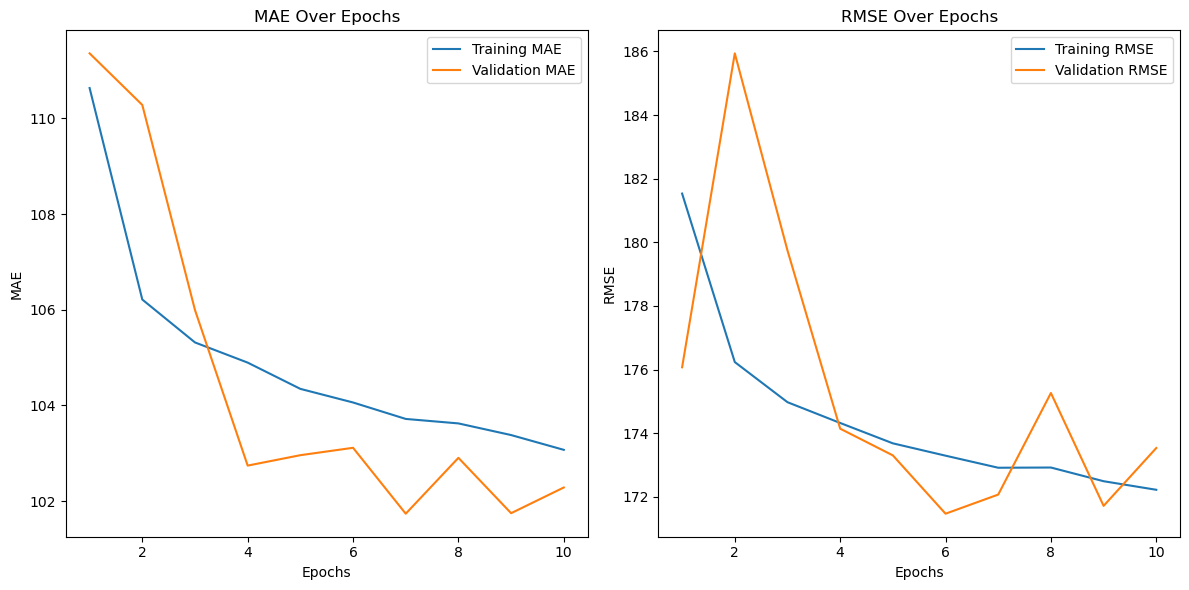

In [112]:
# Calling the function to diaplay the traning history
plot_training_history(history)

##### **B] Tensorflow - Experiment 2**

#### • Defining Architecture

• Setting seed for tensorflow to reproducible results

In [34]:
# Setting seed for tensorflow to reproducible results
tf.random.set_seed(19)

• Instantiating a Tensoflow Sequential() class object

In [35]:
# Instantiating a Tensoflow Sequential() class object
model1 = tf.keras.Sequential()

• Instantiating a 'DenseFeatures()' on 'feature_columns'

In [36]:
# Instantiating a 'DenseFeatures()' on 'feature_columns'
feature_layer = DenseFeatures(feature_columns)

• Creating 2 layers each with 128 neurons, ReLU as the activation function and a dropout layer of 10%

In [37]:
# Creating 2 layers each with 128 neurons, ReLU as the activation function and a dropout layer of 10%
layer1 = Dense(128, activation='relu')
layer2 = Dense(128, activation='relu')
dropout = Dropout(0.1)

• Assembling the feature layer, 2 hidden layers and then the dropout layer and top layer responsible of making final predictions using 'linear' activation function

In [38]:
# Assembling the feature layer, 2 hidden layers and then the dropout layer and top layer responsible of making final predictions using 'linear' activation function
model1.add(feature_layer)
model1.add(layer1)
model1.add(layer2)
model1.add(dropout)
model1.add(Dense(1, activation='linear'))

• Configuring the learning process with 0.01 learning rate using Adam optimiser, MAE loss function and the MAE, RMSE metrics

In [39]:
# • Configuring the learning process with 0.01 learning rate using Adam optimiser, MAE loss function and the MAE, RMSE metrics
model1.compile(loss=tf.keras.losses.MeanAbsoluteError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

• Instantiating an EarlyStopping callback

In [41]:
# Instantiating an EarlyStopping callback that will stop the training if there is no reduction in the validation set loss for ten consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=5,
    restore_best_weights=True)

• Training the model using on the training set with 20 epochs

In [42]:
# Training the model using on the training set with 15 epochs
history1 = model1.fit(train_ds, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping], 
                    epochs=15)

Epoch 1/15
32279/32279 [==============================] - 165s 5ms/step - loss: 114.7391 - mean_absolute_error: 114.7391 - root_mean_squared_error: 188.5950 - val_loss: 106.1167 - val_mean_absolute_error: 106.1167 - val_root_mean_squared_error: 177.3525
Epoch 2/15
32279/32279 [==============================] - 162s 5ms/step - loss: 104.6076 - mean_absolute_error: 104.6076 - root_mean_squared_error: 175.1582 - val_loss: 101.5869 - val_mean_absolute_error: 101.5869 - val_root_mean_squared_error: 172.3927
Epoch 3/15
32279/32279 [==============================] - 161s 5ms/step - loss: 101.9569 - mean_absolute_error: 101.9569 - root_mean_squared_error: 172.6181 - val_loss: 99.9545 - val_mean_absolute_error: 99.9545 - val_root_mean_squared_error: 170.3511
Epoch 4/15
32279/32279 [==============================] - 161s 5ms/step - loss: 100.4294 - mean_absolute_error: 100.4294 - root_mean_squared_error: 171.1559 - val_loss: 97.8063 - val_mean_absolute_error: 97.8063 - val_root_mean_squared_erro

#### 4] Evaluating Model Performance

• Evaluating the performance of this model on the testing set

In [44]:
# Evaluating the performance of this model on the testing set
model1.evaluate(test_ds)

10760/10760 [==============================] - 40s 3ms/step - loss: 92.8249 - mean_absolute_error: 92.8249 - root_mean_squared_error: 161.5885


[92.8248519897461, 92.8248519897461, 161.5885009765625]

The loss decreases from the training(94.57) phase to the validation(93.06) and test(92.82) phases, indicating that the model is learning and generalizing well.

The decreasing MAE score from training(94.57) to validation(93.06) and test(92.82) sets suggests that the model is making accurate predictions with a relatively small average absolute error.

RMSE across training(163.93), validation(162.59), and test(161.58) sets indicates that the model is consistently improving its ability to predict the target variable.

• Displaying the training history

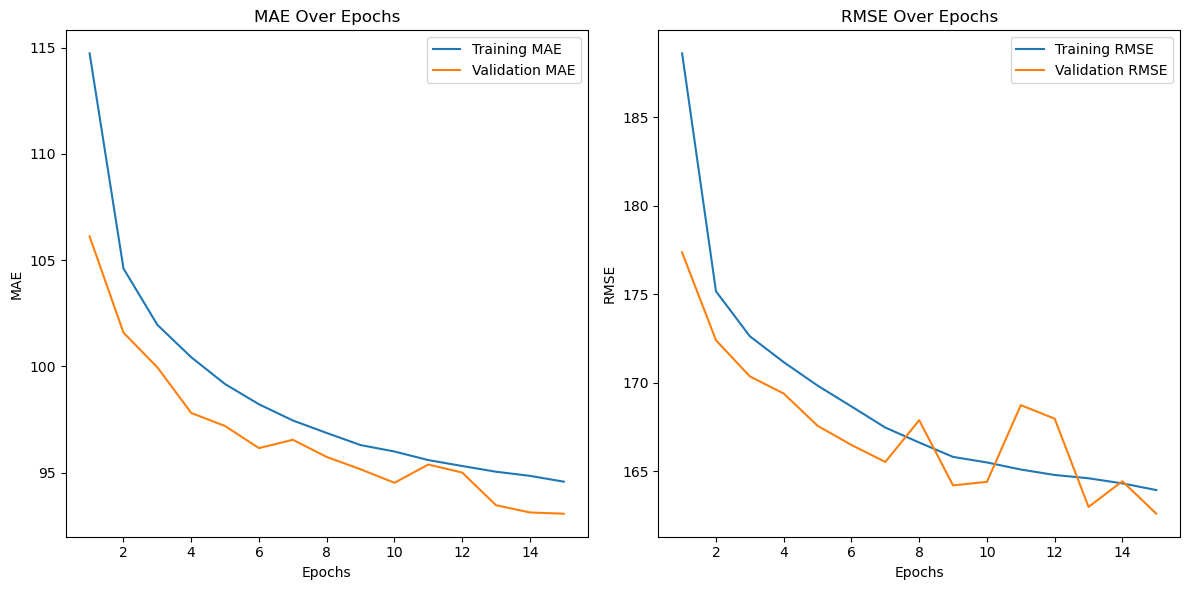

In [45]:
# Calling the function to diaplay the traning history
plot_training_history(history1)

##### **C] Tensorflow - Experiment 3**

#### • Defining Architecture

• Setting seed for tensorflow to reproducible results

In [35]:
# Setting seed for tensorflow to reproducible results
tf.random.set_seed(19)

• Instantiating a Tensoflow Sequential() class object

In [36]:
# Instantiating a Tensoflow Sequential() class object
model2 = tf.keras.Sequential()

• Instantiating a 'DenseFeatures()' on 'feature_columns'

In [37]:
# Instantiating a 'DenseFeatures()' on 'feature_columns'
feature_layer = DenseFeatures(feature_columns)

• Creating 3 layers each with 128 neurons, ReLU as the activation function and a dropout layer of 10%

In [38]:
# Creating 3 layers each with 128 neurons, ReLU as the activation function and a dropout layer of 10%
layer1 = Dense(128, activation='relu')
layer2 = Dense(128, activation='relu')
layer3 = Dense(64, activation='relu')
dropout = Dropout(0.1)

• Assembling the feature layer, 2 hidden layers and then the dropout layer and top layer responsible of making final predictions using 'linear' activation function

In [39]:
# Assembling the feature layer, 3 hidden layers and then the dropout layer and top layer responsible of making final predictions using 'linear' activation function
model2.add(feature_layer)
model2.add(layer1)
model2.add(layer2)
model2.add(layer3)
model2.add(dropout)
model2.add(Dense(1, activation='linear'))

• Configuring the learning process with 0.001 learning rate using Adam optimiser, MAE loss function and the MAE, RMSE metrics

In [40]:
# • Configuring the learning process with 0.001 learning rate using Adam optimiser, MAE loss function and the MAE, RMSE metrics
model2.compile(loss=tf.keras.losses.MeanAbsoluteError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

• Instantiating an EarlyStopping callback

In [41]:
# Instantiating an EarlyStopping callback that will stop the training if there is no reduction in the validation set loss for ten consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True)

• Training the model using on the training set with 11 epochs

In [42]:
# Training the model using on the training set with 11 epochs
history = model2.fit(train_ds, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping], 
                    epochs=11)

Epoch 1/11
32279/32279 [==============================] - 192s 6ms/step - loss: 113.3650 - mean_absolute_error: 113.3650 - root_mean_squared_error: 186.0507 - val_loss: 107.3105 - val_mean_absolute_error: 107.3105 - val_root_mean_squared_error: 181.2141
Epoch 2/11
32279/32279 [==============================] - 188s 6ms/step - loss: 104.4810 - mean_absolute_error: 104.4810 - root_mean_squared_error: 174.6699 - val_loss: 100.6253 - val_mean_absolute_error: 100.6253 - val_root_mean_squared_error: 172.1392
Epoch 3/11
32279/32279 [==============================] - 180s 5ms/step - loss: 101.6160 - mean_absolute_error: 101.6160 - root_mean_squared_error: 171.9077 - val_loss: 98.5097 - val_mean_absolute_error: 98.5097 - val_root_mean_squared_error: 170.2082
Epoch 4/11
32279/32279 [==============================] - 204s 6ms/step - loss: 99.5594 - mean_absolute_error: 99.5594 - root_mean_squared_error: 170.1409 - val_loss: 96.0438 - val_mean_absolute_error: 96.0438 - val_root_mean_squared_error:

2023-11-09 19:05:01.492491: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:1: Filling up shuffle buffer (this may take a while): 815859 of 1032910


   40/32279 [..............................] - ETA: 2:10 - loss: 90.3807 - mean_absolute_error: 90.3807 - root_mean_squared_error: 153.1042     

2023-11-09 19:05:03.361928: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


32279/32279 [==============================] - 177s 5ms/step - loss: 93.6576 - mean_absolute_error: 93.6576 - root_mean_squared_error: 163.3648 - val_loss: 91.4193 - val_mean_absolute_error: 91.4193 - val_root_mean_squared_error: 161.9185
Epoch 11/11
32279/32279 [==============================] - 171s 5ms/step - loss: 93.2662 - mean_absolute_error: 93.2662 - root_mean_squared_error: 162.8716 - val_loss: 91.1369 - val_mean_absolute_error: 91.1369 - val_root_mean_squared_error: 161.2411


#### 4] Evaluating Model Performance

• Evaluating the performance of this model on the testing set

In [43]:
# Evaluating the performance of this model on the testing set
model2.evaluate(test_ds)

10760/10760 [==============================] - 38s 3ms/step - loss: 90.8786 - mean_absolute_error: 90.8786 - root_mean_squared_error: 160.1607


[90.87859344482422, 90.87859344482422, 160.16065979003906]

The loss from training(93.26) to validation(91.13) and test(90.87) sets indicates that the model is learning and generalizing well. The test loss is the lowest, suggesting good performance on unseen data.

MAE score for training(93.26), validation(91.13), and test(90.87) sets suggests that the model is making accurate predictions with a relatively small average absolute error. 

RMSE across training(162.87), validation(161.24), and test(160.16) sets indicates that the model is consistently improving its ability to predict the target variable.

• Displaying the training history

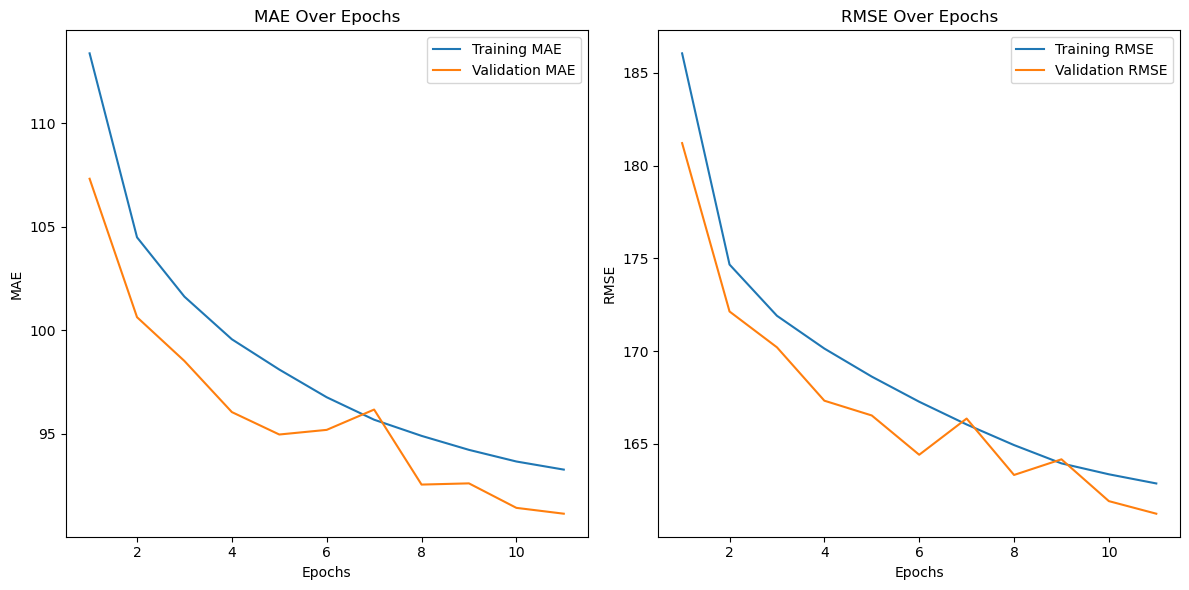

In [45]:
# Calling the function to diaplay the traning history
plot_training_history(history)

• Storing the model to be utilized for fare perdiction 

In [46]:
# Saving the model
model2.save('./tf_keras_model')

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
INFO:tensorflow:Assets written to: ./tf_keras_model/assets


INFO:tensorflow:Assets written to: ./tf_keras_model/assets
